<a href="https://colab.research.google.com/github/kkiprono4/AERO-BirdsEye-CLINICAL-RESEARCH/blob/main/Group_1_Core_Project_AERO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AERO-BirdsEye Medical Research**

Group Members
1. Collins Bett
2. Jocine Nabwire
3. Victoria Maina
4. Maureen Chepkirui
5. Francis Thairu
6. Kevin Kiprono


## **1. Defining the Question**

### a) Specifying the Question

The research problem is to find out completed and withdrawn tests done by GSK (GlaxoSmithKline plc)

To investigate which sponsor had done the most trials.

To find which condition was most investigated.

To find which sponsor had done the most tests on condition X(which is the most tested condition).

### b) Defining the Metric for Success

This analysis requires us to come up with a solution that will help reduce waste of resources and time and be able to focus on drug development.We therefoe need to  analyze on the number of trials each sponsor carried out, the conditions that were on trial especially in regards to each sponsor and also the status of trials that were carried out(whether they were completed or not). Our findings will be used by the government  regulatory board to give proper directives to these companies in order to effect change.we will implement the solution by analysing our data and providing  insights that arise.


### c) Understanding the context 

> Waste and inefficiency in drug development are big problems. They can be hard to spot, especially when you are in the midst of the process. A new way of visualizing clinical trials might help.
Some experts believe that as much as 85% of medical research may be wasteful due to biases in study design, lack of publication, unnecessary duplication, or investigating questions of little importance. It is also estimated that only about one (or maybe two) of every 10 drugs that enter into clinical testing will turn out to be effective.
Here’s a proof-of-concept for the bird’s-eye view that uses clinical trials.gov data and the AERO-BirdsEye to analyze all of the registered clinical trials from 10 large pharmaceutical companies — AbbVie, Bayer, Gilead, GSK, Johnson & Johnson, Merck, Novartis, Pfizer, Roche, and Sanofi — over past 20 years or so.


### d) Recording the Experimental Design

> The following steps were taken:

1. Business Understanding
2. Reading the data
3. Checking our data
4. Data cleaning
5. Implementing the solution
6. Challenging the solution

### e) Data Relevance

Datasets Provided:

Aero-Birds Eye View [Link](https://www.kaggle.com/yamqwe/2019-w33-a-birds-eye-view-of-clinical-trialse)

## **2. Reading the Data**

In [ ]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

### Reading the Dataset from our CSV file

In [ ]:
#loading the dataset
df=pd.read_csv("/content/AERO-BirdsEye-Data.csv")
#previewing the dataset
df.head()

,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


In [ ]:
#checking the tail
df.tail()

,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
13743,NCT03726879,Roche,"A Phase III, Randomized, Double-Blind, Placebo...",This study (also known as IMpassion050) will e...,2018,12,Phase 3,224,Recruiting,Breast Neoplasms
13744,NCT03735121,Roche,A Two-Part Phase Ib/II Study to Investigate th...,"This study will evaluate the pharmacokinetics,...",2018,12,Phase 1,245,Recruiting,Lung Neoplasms
13745,NCT03761849,Roche,"A Randomized, Multicenter, Double-Blind, Place...","This study will evaluate the efficacy, safety,...",2018,12,Phase 3,660,Not yet recruiting,Huntington Disease
13746,NCT03762681,Roche,"A Randomized, Placebo-controlled,Observer-blin...","This study is designed to assess the safety, t...",2018,12,Phase 1,75,Not yet recruiting,Hepatitis
13747,NCT03779334,Roche,An Open-Label Study of Risdiplam in Infants Wi...,A global study of oral risdiplam in pre-sympto...,2019,2,Phase 2,25,Not yet recruiting,"Muscular Atrophy, Spinal"


## **3. Data Understanding**

In [ ]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13748 entries, 0 to 13747
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NCT          13748 non-null  object
 1   Sponsor      13748 non-null  object
 2   Title        13604 non-null  object
 3   Summary      13737 non-null  object
 4   Start_Year   13748 non-null  int64 
 5   Start_Month  13748 non-null  int64 
 6   Phase        13485 non-null  object
 7   Enrollment   13748 non-null  int64 
 8   Status       13748 non-null  object
 9   Condition    13748 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


Our dataset comprises of object and integer data types.

In [ ]:
#checking the columns
#
df.columns

Index(['NCT', 'Sponsor', 'Title', 'Summary', 'Start_Year', 'Start_Month',
       'Phase', 'Enrollment', 'Status', 'Condition'],
      dtype='object')

We have 10 columns as shown above.

In [ ]:
#Getting the shape
#
df.shape

(13748, 10)

There are 13,748 records and 10 variables.

In [ ]:
#getting basic statistical details
df.describe()

,Start_Year,Start_Month,Enrollment
count,13748.000000,13748.000000,13748.000000
mean,2009.155586,6.691155,440.783678
std,4.797615,3.486359,1944.530768
min,1984.000000,1.000000,0.000000
25%,2006.000000,4.000000,40.000000
50%,2009.000000,7.000000,124.000000
75%,2013.000000,10.000000,365.000000
max,2020.000000,12.000000,84496.000000


The count,mean,std,min,max and quartiles are shown above.

In [ ]:
#getting the number unique values in each column
df.nunique()

NCT            13748
Sponsor           10
Title          13434
Summary        13564
Start_Year        35
Start_Month       12
Phase              7
Enrollment      1695
Status             9
Condition        867
dtype: int64

These are the number of unique values in each column.

In [ ]:
#checking for missing values
df.isnull().sum().sum()

418

There are 418 missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### 4.1 Completeness

In [ ]:
#checking for null values across each column
df.isnull().sum()

NCT              0
Sponsor          0
Title          144
Summary         11
Start_Year       0
Start_Month      0
Phase          263
Enrollment       0
Status           0
Condition        0
dtype: int64

Title, Summary and Phase columns have unique values.

In [ ]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

NCT            0.00
Sponsor        0.00
Title          1.05
Summary        0.08
Start_Year     0.00
Start_Month    0.00
Phase          1.91
Enrollment     0.00
Status         0.00
Condition      0.00
dtype: float64

In [ ]:
#After Checking percentage of the missing values
#We replaced the missing values with unknown in the title and phase columns
nulls='unknown'
df['Title'].fillna(nulls,inplace=True)
df['Phase'].fillna(nulls,inplace=True)
df.head(5)

,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


We filled with unknown since we do not want to assume that no data was available.

### 4.2 Validity

In [ ]:
#Irrelevant Data
#Drop columns we do not need.
#
df=df.drop(['Summary'], axis = 1)

The Summary column was not necessary for our analysis.

In [ ]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

To make our columns look neater.

In [ ]:
# Changing column names to lower case
df.columns= df.columns.str.lower()


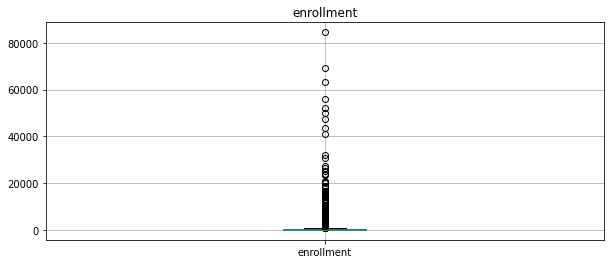

In [ ]:
#checking outliers
plt.figure(figsize=(10, 4))
df.boxplot(['enrollment'])
plt.title('enrollment')
plt.show()

There are existing outliers but they won't be dropped as they are true values to the data,i.e, represent real time data.

In [ ]:
#inspecting our dataset
# Checking for Anomalies in enrollment column

q1_taken = df['enrollment'].quantile(.25)
q3_taken = df['enrollment'].quantile(.75)

iqr_taken = q3_taken - q1_taken

print(iqr_taken)

325.0


The results indicate that 325 entries in the enrollment column were not within the middle of 50% of the column.

### 4.3 Consistency

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

No duplicates.

### 4.4 Uniformity

In [ ]:
#no action was done

### 4.5 Accuracy

In [ ]:
#no action was done

# Exporting our new Dataset

In [ ]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it

df.to_csv('New_Aero_Data.csv')
df2 = pd.read_csv('New_Aero_Data.csv', index_col=0)
df2.head(5)

,nct,sponsor,title,start_year,start_month,phase,enrollment,status,condition
0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,1997,7,Phase 2,75,Completed,Leukemia
1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


## **5. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of central Tendacies

In [ ]:
#using for loops to get the mean, mode and median for the enrollment column
numerical_columns=['enrollment']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df2[column].mean()))
  print(column + ', Mode: ' + str(df2[column].mode()))
  print(column + ', Median: ' + str(df2[column].median()))




enrollment, Mean: 440.7836776258365
enrollment, Mode: 0    0
dtype: int64
enrollment, Median: 124.0


In [ ]:
#getting the mode for start year and start month columns
df2[['start_month','start_year']].mode()

,start_month,start_year
0,10,2007


#### Measures of dispersion

In [ ]:
numerical_columns=['enrollment']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df2[column].std()))
  print(column + ', Variance: ' + str(df2[column].var()))
  print(column + ', Skewness: ' + str(df2[column].skew()))
  print(column + ', Kurtosis: ' + str(df2[column].kurt()))
  print(column + ', Quartiles: ' + str(df2[column].quantile([0.25,0.5,0.75])))



enrollment, Standard deviation: 1944.5307681407212
enrollment, Variance: 3781199.9082459435
enrollment, Skewness: 21.499503192289122
enrollment, Kurtosis: 649.5716126309251
enrollment, Quartiles: 0.25     40.0
0.50    124.0
0.75    365.0
Name: enrollment, dtype: float64


1. Positive value means the distribution is postively skewed,i.e, skewed to the right.(Mean> Mode)
2. Kurtosis value is higher than that of the normal distribution thus leptokurtic,i.e, it is heavy tailed and outliers are present.

In [ ]:
#range
enrollment_max=df2['enrollment'].max()
enrollment_min=df2['enrollment'].min()
#calculating range
range= enrollment_max - enrollment_min
enrollment_max,enrollment_min,range

(84496, 0, 84496)

#### Histograms

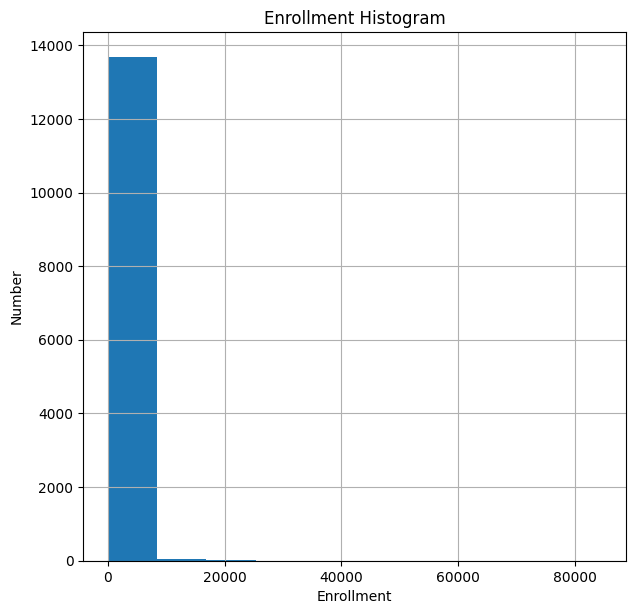

In [ ]:
#plotting the histogram for the enrollment column
#
plt.figure(figsize = (7,7), dpi = 100)
df2['enrollment'].hist()
plt.title('Enrollment Histogram')
plt.xlabel('Enrollment')
plt.ylabel('Number')
plt.show()

#### Bar Graphs

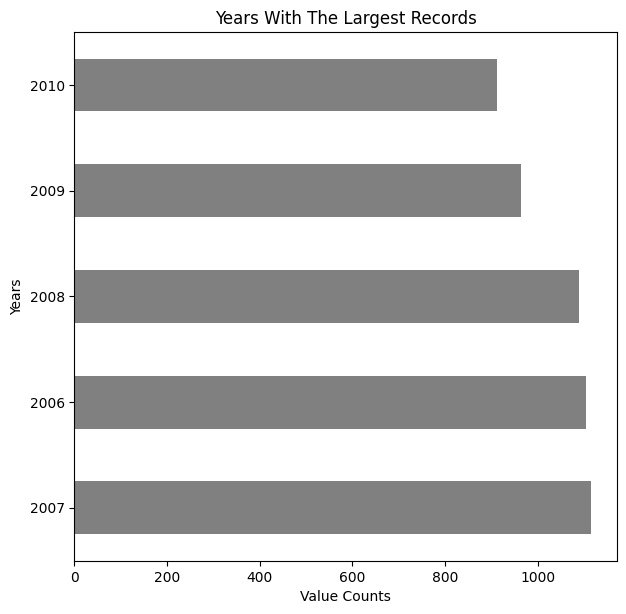

In [ ]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.start_year.value_counts().head()
df2.start_year.value_counts().head().plot(kind= 'barh',color='Grey')
plt.title('Years With The Largest Records')
plt.xlabel('Value Counts')
plt.ylabel('Years')
plt.show()

The year 2007 had the most tests.

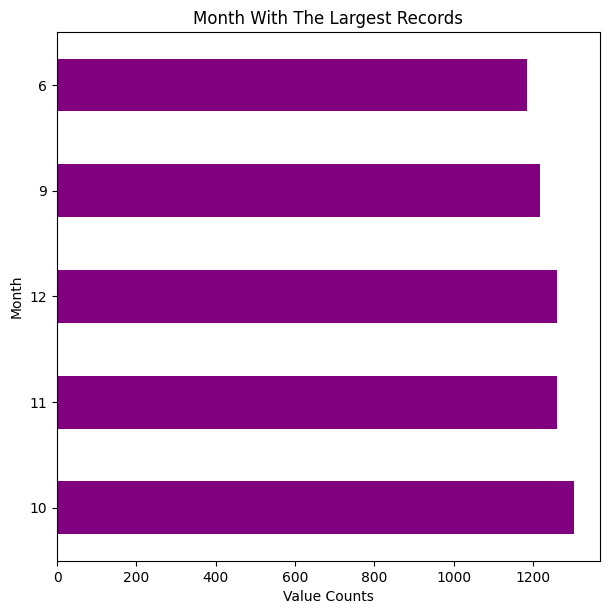

In [ ]:
##creating a bar graph of the months with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.start_month.value_counts().head()
df2.start_month.value_counts().head().plot(kind= 'barh',color='Purple')
plt.title('Month With The Largest Records')
plt.xlabel('Value Counts')
plt.ylabel('Month')
plt.show()

October (10) had the most tests.

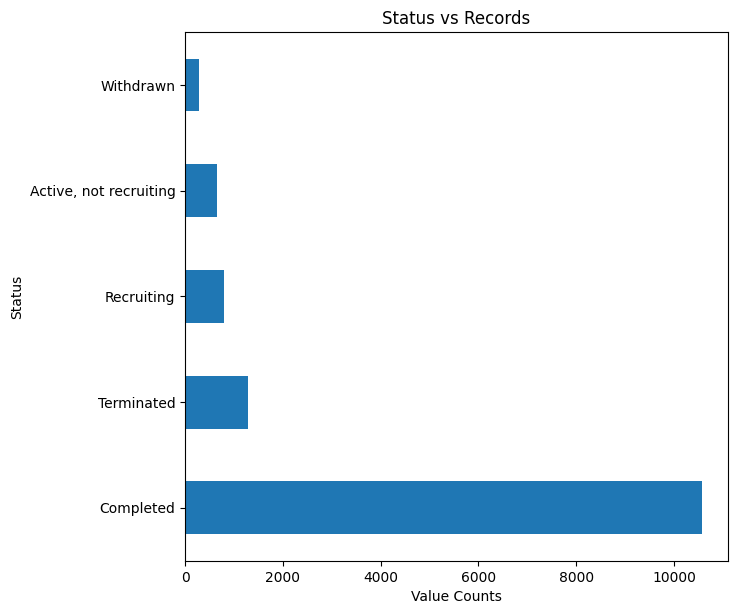

In [ ]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.status.value_counts().head()
df2.status.value_counts().head().plot(kind= 'barh')
plt.title('Status vs Records')
plt.xlabel('Value Counts')
plt.ylabel('Status')
plt.show()

Most of the tests done were completed.




### Bivariate Analysis

In [ ]:
#this label encoding will be needed for correlation and multivariate analysis
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns = ['sponsor',	'title',	'start_year',	'start_month',	'phase', 'enrollment',	'status', 'condition']
#
# we convert the categorical variables 
#
df3= df2[columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df3.head()

,sponsor,title,start_year,start_month,phase,enrollment,status,condition
0,9,4548,11,6,3,75,1,449
1,9,12283,12,0,3,0,8,253
2,9,12207,13,2,2,36,7,502
3,9,12285,13,4,3,0,8,605
4,9,1930,14,9,5,0,7,166


#### Heat Map

In [ ]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df3.corr()

corr.style.background_gradient(cmap='coolwarm')

,sponsor,title,start_year,start_month,phase,enrollment,status,condition
sponsor,1.000000,-0.011784,-0.101366,0.004454,0.099278,0.036126,0.032792,-0.056252
title,-0.011784,1.000000,-0.112555,-0.008051,0.064699,-0.024749,-0.029922,0.031042
start_year,-0.101366,-0.112555,1.000000,-0.019964,-0.162698,-0.095493,0.173859,0.003115
start_month,0.004454,-0.008051,-0.019964,1.000000,-0.006139,0.017775,0.001466,0.001729
phase,0.099278,0.064699,-0.162698,-0.006139,1.000000,0.371301,-0.032728,-0.029078
enrollment,0.036126,-0.024749,-0.095493,0.017775,0.371301,1.000000,-0.136990,0.023968
status,0.032792,-0.029922,0.173859,0.001466,-0.032728,-0.136990,1.000000,-0.040925
condition,-0.056252,0.031042,0.003115,0.001729,-0.029078,0.023968,-0.040925,1.000000


1. status and sponsor

correlation coefficient = 0.032792, which is greater than 0 indicating a positive relationship between the two variables.
Since the coefficient is close to 0 the two variables have low correlation

2. condition and enrollment

correlation coefficient = 0.023968, which is closer to 0 indicating a positive relationship between the two variables

3. Enrollment and title

correlation coefficient = -0.024749, which is less than 0 thus there is no relation between the two variables.

4. start year and start month

correlation coefficient = -0.019964,which is less than 0 thus there is no relation between the two variables.

#### Scatter Plots

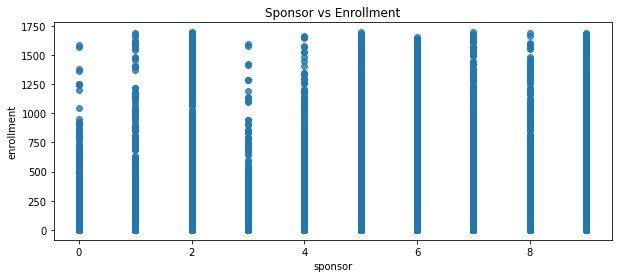

In [ ]:
#scatter plot to show sponser verses enrollment
plt.figure(figsize=(10, 4))
sns.regplot(x = df3["sponsor"], y = df3["enrollment"], fit_reg=False)
plt.title('Sponsor vs Enrollment')
plt.xlabel('sponsor')
plt.ylabel('enrollment')
plt.show()

There is no relation between enrollment and sponsor since the dots are evenly distributed all over the graph.

#### Stacked Column Chart

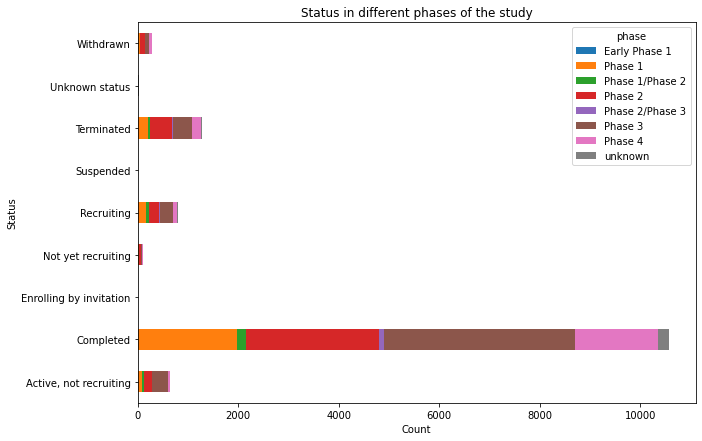

In [ ]:
#Status vs phase
plt.rcParams["figure.figsize"] = (10,7)
df2.groupby(['status', 'phase']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Status in different phases of the study')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

We see that most of the tests were completed.

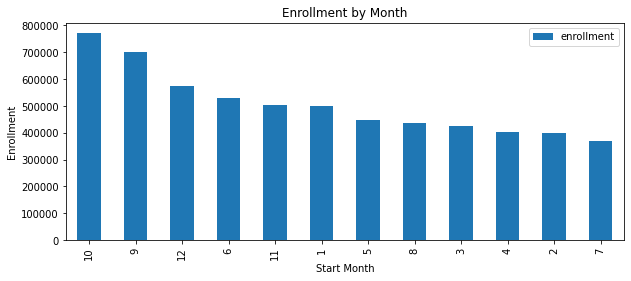

In [ ]:
#checking enrollment by month
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('start_month')['enrollment'].sum().sort_values(ascending=False).to_frame().plot(kind = "bar", title = "Enrollment by Month");
ax.set(xlabel='Start Month', ylabel='Enrollment')
plt.show()

October(10) had the highest enrollment.

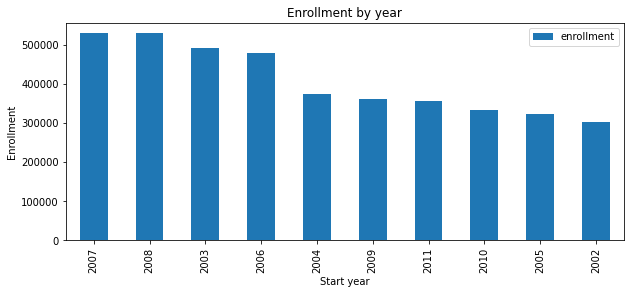

In [ ]:
#checking which year was highest in enrollment
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('start_year')['enrollment'].sum().sort_values(ascending=False).to_frame().head(10).plot(kind = "bar", title = "Enrollment by year");
ax.set(xlabel='Start year', ylabel='Enrollment')
plt.show()

2007 had the highest enrollment.

#### Line Charts

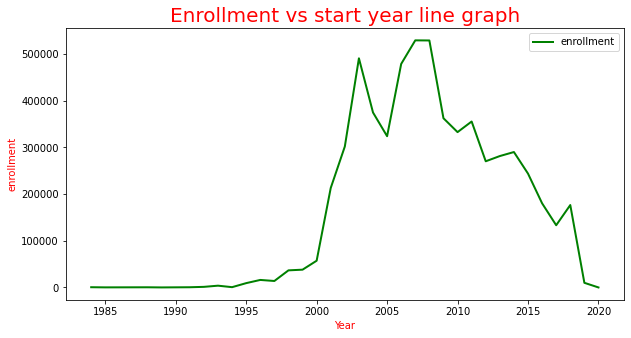

In [ ]:
#Biviate analysis: Enrollment vs start month
enrolmentDf=df2.groupby([df2.start_year]).sum()
enrolmentDf.enrollment.plot(figsize=(10,5), linewidth=2, color="g")
plt.title('Enrollment vs start year line graph', fontsize=20, color="r")
plt.xlabel('Year', fontsize=10, color="r");
plt.ylabel('enrollment', fontsize=10, color="r")
plt.legend()
plt.show()

The year with the most enrollment was 2007

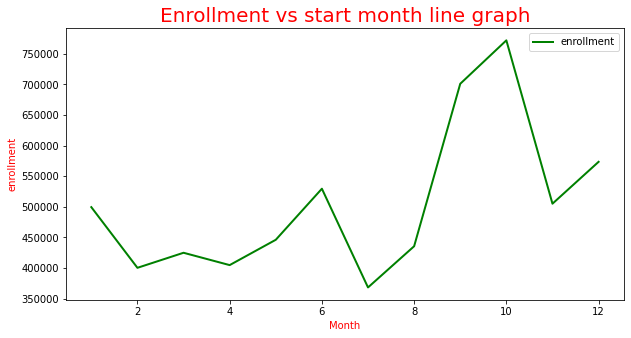

In [ ]:
#Biviate analysis: Enrollment vs start month
enrolmentDf=df2.groupby([df2.start_month]).sum()
enrolmentDf.enrollment.plot(figsize=(10,5), linewidth=2, color="g")
plt.title('Enrollment vs start month line graph', fontsize=20, color="r")
plt.xlabel('Month', fontsize=10, color="r");
plt.ylabel('enrollment', fontsize=10, color="r")
plt.legend()
plt.show()

October had the highest enrollment.

### Multivariate Analysis

> Label encoding had been done before and a new dataset df3 was formed.

#### Linear Discriminant Analysis (LDA)

In [ ]:
# Divide the dataset into features and corresponding labels.
x= df3.drop(["sponsor"],1)
y = df3["sponsor"]

In [ ]:
#checking for unique values of the target variable
y.unique()

array([9, 7, 6, 5, 2, 1, 0, 4, 3, 8])

In [ ]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(x, y)
lda_feat = lda_. transform(x)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-3.25396786e-05,  1.98069119e-01,  2.13054060e-02,
         2.06587326e-03, -2.03735564e-04, -1.08535237e-01,
        -3.63007277e-04],
       [ 8.30508844e-05,  4.71855246e-02, -1.81848627e-02,
         3.39677769e-02, -1.39273094e-04, -8.34811905e-02,
        -6.47823529e-05],
       [ 6.46829358e-05, -2.36429825e-03,  4.31923764e-03,
        -1.67569432e-01,  2.42255380e-04, -4.21870965e-02,
         3.98657254e-04],
       [-1.24322038e-04,  1.14941288e-01, -8.39572193e-03,
        -2.62744336e-03, -4.74347443e-04, -5.83935167e-02,
        -4.12878730e-04],
       [ 1.11886003e-05, -2.47854048e-03,  4.65717308e-03,
         1.33671816e-01, -5.31656203e-04, -2.23413895e-02,
         4.55601418e-04],
       [-4.33945401e-05, -5.32133764e-02, -1.02639859e-02,
        -5.92525114e-02,  4.69387054e-04,  6.44127525e-02,
         2.00894025e-04],
       [-5.64981336e-05,  2.25523387e-02,  1.29535772e-03,
         9.00108005e-02, -1.49623401e-04,  2.23665353e-03,
         2.1583137

In [ ]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=x.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
start_year,0.198069
start_month,0.021305
phase,0.002066
title,-0.000033
enrollment,-0.000204
condition,-0.000363
status,-0.108535


## **7. Implementing the Solution**

### Assessing the Questions

In [ ]:
# 1. Which sponsor had done the most tests/ investigation
df2['sponsor'].value_counts()

GSK         2473
Novartis    2320
Pfizer      1970
Merck       1770
Sanofi      1524
JNJ         1143
Roche       1095
Bayer        619
Gilead       417
AbbVie       417
Name: sponsor, dtype: int64

GSK had done more tests.

In [ ]:
# 2. Which condition was most investigated?
df['condition'].value_counts().head()

Diabetes Mellitus, Type 2                 536
Breast Neoplasms                          388
Pulmonary Disease, Chronic Obstructive    339
Hypertension                              338
Asthma                                    334
Name: condition, dtype: int64

Diabetes Mellitus, Type 2 was the most investigated.

In [ ]:
# 3. Which sponsor had done the most tests on condition X(which is the most tested condition)?
df['sponsor'][df['condition'] =='Diabetes Mellitus, Type 2'].value_counts()

Sanofi      111
GSK         105
Novartis     89
Merck        75
Roche        56
Pfizer       50
JNJ          42
Bayer         5
Gilead        3
Name: sponsor, dtype: int64

Sanofi had done the most tests on Diabetes Melitus, Type 2.

In [ ]:
# 4. Which condition had the sponsor with the most tests investigated?
df['condition'][df['sponsor']== 'GSK'].value_counts().head()

Pulmonary Disease, Chronic Obstructive    197
Asthma                                    138
Influenza, Human                          136
Diabetes Mellitus, Type 2                 105
Hepatitis B                                90
Name: condition, dtype: int64

Pulmonary Disease, Chronic Obstructive was the most investigated condition by GSK(sponsor with the most tests).

In [ ]:
# 5. Which sponsor had the most successive completion of drug tests?
df['sponsor'][df['status'] =='Completed'].value_counts().head()

GSK         2116
Novartis    1742
Pfizer      1473
Merck       1360
Sanofi      1232
Name: sponsor, dtype: int64

GSK had the most successive completion of drug tests.

In [ ]:
# 6. Which year and month had the most tests/investigations?
print(df['start_year'].value_counts().head())
print(df['start_month'].value_counts().head())

2007    1115
2006    1104
2008    1089
2009     964
2010     913
Name: start_year, dtype: int64
10    1302
11    1260
12    1259
9     1217
6     1185
Name: start_month, dtype: int64


2007 and October had the most tests done.

### Hypothesis Testing

> Null Hypothesis:  The number of completed tests done by GSK was greater than or equal to the withdrawn tests.

H0 : Number of completed tests => Number of withdrawn tests

> Alternative Hypothesis: The number of completed tests done by GSK was less than the withdrawn tests.

H1 : Number of completed tests < Number of withdrawn tests


In [ ]:
#creating a new dataset for the hypothesis testing
gsk=df[df['sponsor']=='GSK']
gsk

,nct,sponsor,title,start_year,start_month,phase,enrollment,status,condition
7584,NCT00041509,GSK,ThromboEMbolism Prevention Efficacy and Safety...,2002.0,1.0,Phase 2,343.0,Completed,Thromboembolism
7585,NCT00379990,GSK,"A Randomised, Double-blind, Placebo-controlled...",2006.0,1.0,Phase 2,48.0,Completed,"Arthritis, Rheumatoid"
7586,NCT02113436,GSK,Clinical Assessment of Fluticasone Propionate/...,2014.0,5.0,Phase 4,300.0,Completed,Asthma
7587,NCT02723786,GSK,"A Phase 2 Pilot, Multicenter, Single Arm Study...",2016.0,8.0,Phase 2,31.0,Recruiting,Delayed Graft Function
7588,NCT01424501,GSK,Safety and Immunogenicity Study of GSK Biologi...,2011.0,11.0,Phase 2,142.0,Terminated,Tuberculosis
...,...,...,...,...,...,...,...,...,...
10052,NCT01128894,GSK,"A Randomized, Open-Label, Parallel-Group, Mult...",2010.0,5.0,Phase 3,841.0,Completed,"Diabetes Mellitus, Type 2"
10053,NCT00025727,GSK,"A Phase III, Randomized, Multicenter, Parallel...",2001.0,5.0,Phase 3,330.0,Unknown status,HIV Infections
10054,NCT01615796,GSK,"A Two-Part Study to Evaluate Safety, Tolerabil...",2012.0,6.0,Phase 1,86.0,Completed,Respiratory Tract Infections
10055,NCT01462565,GSK,"A Single-arm, Open Label Study Evaluating the ...",2011.0,11.0,Phase 4,16.0,Completed,"Hypertension, Pulmonary"


In [ ]:
#getting the shape of the new dataset
gsk.shape

(2473, 9)

It has 2473 records and 9 variables.

In [ ]:
# getting a stratified sample
gsk_sample = gsk.groupby('status', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
gsk_sample

,nct,sponsor,title,start_year,start_month,phase,enrollment,status,condition
9620,NCT02820844,GSK,A Phase III Study to Evaluate the Efficacy and...,2016,8,Phase 3,250,"Active, not recruiting","Urinary Bladder, Overactive"
9123,NCT03261167,GSK,"A Phase III Study (a Placebo Controlled, Rando...",2017,8,Phase 3,124,"Active, not recruiting",Stroke
9308,NCT03069989,GSK,A Study of Single Doses to Evaluate the Safety...,2017,6,Phase 1,8,"Active, not recruiting",Idiopathic Pulmonary Fibrosis
8554,NCT02119156,GSK,"An Open-label, Non-randomized, 52-Week Study t...",2014,5,Phase 3,163,"Active, not recruiting","Lupus Erythematosus, Systemic"
8819,NCT01602900,GSK,An Open Label Positron Emission Tomography Stu...,2011,11,Phase 1,8,Completed,Huntington Disease
...,...,...,...,...,...,...,...,...,...
8880,NCT02135666,GSK,Long-term Hepatitis A and B Antibody Persisten...,2015,5,Phase 4,0,Withdrawn,Hepatitis B
9637,NCT02229240,GSK,Study GLP111892: Albiglutide Versus Placebo as...,2015,8,Phase 3,0,Withdrawn,"Diabetes Mellitus, Type 2"
9623,NCT02034097,GSK,A Phase II Study to Evaluate Foretinib in Geno...,2014,4,Phase 2,0,Withdrawn,"Carcinoma, Non-Small-Cell Lung"
7668,NCT01039610,GSK,A Single Center Four Part Study in Healthy Adu...,2009,11,Phase 1,0,Withdrawn,Bacterial Infections


<Figure size 720x288 with 0 Axes>

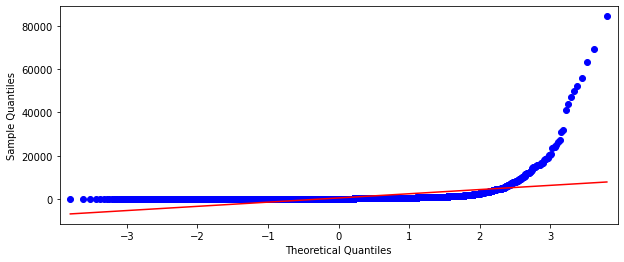

In [ ]:
#performing normality test
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
plt.figure(figsize=(10, 4))
qqplot(df2['enrollment'], line='s')
pyplot.show();


Enrollment column is not normally distributed.

In [ ]:
#imorting libraries necessary for the hypothesis testing
import statsmodels.api as sm
from scipy.stats import norm
import pylab

from statsmodels.stats import weightstats as stests
%matplotlib inline

In [ ]:
#encoding the object columns
columns = ['sponsor',	'title',	'start_year',	'start_month',	'phase', 'enrollment',	'status', 'condition']
#
# we convert the categorical variables 
#
df4= gsk_sample[columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df4.head()

,sponsor,title,start_year,start_month,phase,enrollment,status,condition
9620,0,48,20,7,4,100,0,109
9123,0,46,21,7,4,70,0,104
9308,0,115,21,5,0,5,0,53
8554,0,150,18,4,4,82,0,62
8819,0,131,15,10,0,5,1,48


In [ ]:
#finding the p value using ztest
ztest ,pval1 = stests.ztest(x1=df4['status'], x2=df4['status'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

1.0
Accept Null Hypothesis


The p value(1.0) is greater than the significance level(alpha=0.05) thus is not statistically significant and indicates strong evidence for the null hypothesis. We therefore fail to reject the null hypothesis thus there the number of completed tests done by GSK (​GlaxoSmithKline plc )was greater than or equal to the withdrawn tests

## **8.Challenging the solution**

In [ ]:
#importing necessary libaries
from scipy.stats import chi2_contingency


In [ ]:
#installing biokitinfo
!pip install bioinfokit

In [ ]:
#plotting a crosstab necessary for the chi square test
sponsor=gsk_sample['sponsor']
status=gsk_sample['status']
ctab1=pd.crosstab(sponsor,status)
ctab1

status,"Active, not recruiting",Completed,Not yet recruiting,Recruiting,Terminated,Unknown status,Withdrawn
sponsor,,,,,,,
GSK,4,212,1,7,15,1,7


In [ ]:
#importing our libraries
from bioinfokit.analys import stat

In [ ]:
#performing the chi square test
res=stat()
res.chisq(df=ctab1)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            0             0          1
Log-likelihood     0             0          1



After challenging our initial solution, we get a p value of 1.0 which is the same as the one got during hypothesis testing, we therfore fail to reject null hypothesis.

## **9. Recommendations**

1. The government  regulatory board can use this information to give proper directives to these companies in order to effect change.

2. More investigations should be made  on companies that are dragging behind when it comes to the carrying out of the trials.

3. Proper publishing of trials should be made to avoid wastage of resources and time by  the pharmaceutical companies.

4. More resources should be directed to conditions that affect more people.
